In [12]:
# Using Fashioanyn CIFAR-10 in a Convolutional Neural Network
# This time done with fucntional API
# Uses data augmentation and batch normalisation to improve performance
# Suggest running this on Google Collab -> its quite slow!

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dropout, Dense, Conv2D, Flatten, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
import tensorflow as tf

In [14]:
cifar10 = tf.keras.datasets.cifar10

In [15]:
# Import data

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [16]:
# Scaling, flattening

X_train = X_train/X_train.max()
X_test = X_test/X_test.max()
y_train = y_train.flatten()
y_test = y_test.flatten()

In [17]:
print(X_train.shape)

(50000, 32, 32, 3)


In [18]:
print(X_test.shape)

(10000, 32, 32, 3)


In [19]:
# Don't need extra dimensions!

In [20]:
# Finding numper of unique classes

n_classes = np.unique(y_train)
print(f" There are {len(n_classes)} unique classes in dataset!")

 There are 10 unique classes in dataset!


In [21]:
# Shape of input

X_train[0].shape

(32, 32, 3)

In [27]:
# Making model using functional API
# Uncomment bits to experiment with behavior!

i = Input(shape = X_train[0].shape)
#x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
#x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
#x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
#x = Flatten()(x)
#x = Dropout(0.2)(x)
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

#x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense((len(n_classes)), activation = 'softmax')(x)

model = Model(i,x)

In [28]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_24 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        1849

In [29]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 520s 333ms/step - loss: 1.3138 - accuracy: 0.5378 - val_loss: 1.0714 - val_accuracy: 0.6297
Epoch 2/10
1563/1563 [==============================] - 752s 481ms/step - loss: 0.8526 - accuracy: 0.7078 - val_loss: 0.9532 - val_accuracy: 0.6835
Epoch 3/10
1563/1563 [==============================] - 467s 299ms/step - loss: 0.6832 - accuracy: 0.7673 - val_loss: 0.7568 - val_accuracy: 0.7480
Epoch 4/10
1563/1563 [==============================] - 468s 299ms/step - loss: 0.5687 - accuracy: 0.8072 - val_loss: 0.7489 - val_accuracy: 0.7533
Epoch 5/10
1563/1563 [==============================] - 499s 319ms/step - loss: 0.4768 - accuracy: 0.8384 - val_loss: 0.5805 - val_accuracy: 0.8145
Epoch 6/10
1563/1563 [==============================] - 475s 304ms/step - loss: 0.3961 - accuracy: 0.8649 - val_loss: 0.6561 - val_accuracy: 0.7999
Epoch 7/10
1563/1563 [==============================] - 441s 282ms/step - loss: 0.3296 - accuracy: 0.8869 - val_

In [30]:
# Data augmentation - time consuming!

batch_size = 16
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1)
train_gen = data_gen.flow(X_train,y_train,batch_size)
steps_per_epoch = X_train.shape[0]// batch_size

r = model.fit(train_gen, validation_data=(X_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 10)

Epoch 1/10
3125/3125 [==============================] - 533s 171ms/step - loss: 0.6015 - accuracy: 0.8000 - val_loss: 0.6086 - val_accuracy: 0.8060
Epoch 2/10
3125/3125 [==============================] - 530s 170ms/step - loss: 0.5196 - accuracy: 0.8265 - val_loss: 0.6727 - val_accuracy: 0.7926
Epoch 3/10
3125/3125 [==============================] - 518s 166ms/step - loss: 0.4733 - accuracy: 0.8408 - val_loss: 0.5694 - val_accuracy: 0.8205
Epoch 4/10
3125/3125 [==============================] - 538s 172ms/step - loss: 0.4432 - accuracy: 0.8499 - val_loss: 0.5791 - val_accuracy: 0.8186
Epoch 5/10
3125/3125 [==============================] - 528s 169ms/step - loss: 0.4061 - accuracy: 0.8622 - val_loss: 0.5770 - val_accuracy: 0.8242
Epoch 6/10
3125/3125 [==============================] - 621s 199ms/step - loss: 0.3843 - accuracy: 0.8723 - val_loss: 0.5382 - val_accuracy: 0.8345
Epoch 7/10
3125/3125 [==============================] - 550s 176ms/step - loss: 0.3544 - accuracy: 0.8817 - val_

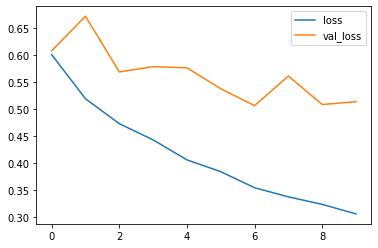

In [31]:
# Plotting losses
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

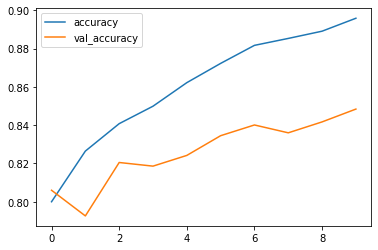

In [32]:
# Plotting accuracies
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [33]:
# Very likley over-fitting

In [34]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
import itertools

def confusion_matrix_plot(cm, classes,
                         normalize = False,
                         title ='Confusion Matrix',
                         cmap = plt.cm.Blues):
    '''
    This function plots the confusion matrix. Import to any system with multi-label classification
    '''

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Non-normalized confusion matrix")
    print(cm)
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt),
                horizontalalignment='center',
                color = 'white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.show

Non-normalized confusion matrix
[[881   3  44  12   5   0  12   4  29  10]
 [ 12 917   2   2   0   0   5   0   6  56]
 [ 36   3 790  18  42  24  70  11   1   5]
 [ 17   4  50 661  44  99  91  18   4  12]
 [ 13   2  59  18 809  13  61  23   2   0]
 [  7   2  34  79  34 780  33  23   0   8]
 [  3   0  13  11   6   8 952   3   1   3]
 [ 16   2  24  11  31  19  10 880   1   6]
 [ 67  10   8   3   2   0   8   4 878  20]
 [ 17  28   1   3   2   0   5   0   8 936]]


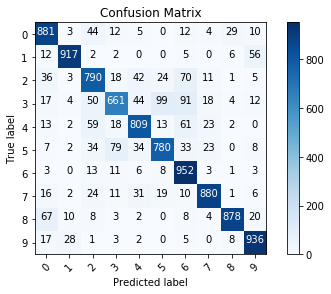

In [35]:
p_test = model.predict(X_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
confusion_matrix_plot(cm, list(range(10)))

Text(0.5, 1.0, 'True label = frog, Predicted label = bird')

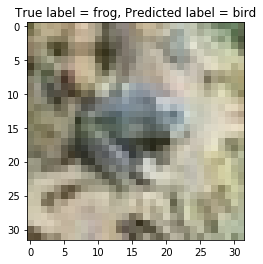

In [36]:
# Plotting misclassified samples
labels = '''
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck
'''.split()

misclass_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclass_index)
plt.imshow(X_test[i])
plt.title(f"True label = {labels[y_test[i]]}, Predicted label = {labels[p_test[i]]}")

Text(0.5, 1.0, 'True label = deer, Predicted label = frog')

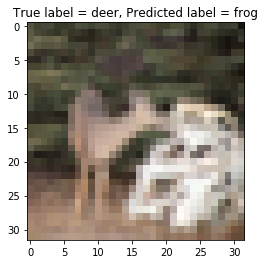

In [37]:
misclass_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclass_index)
plt.imshow(X_test[i])
plt.title(f"True label = {labels[y_test[i]]}, Predicted label = {labels[p_test[i]]}")

Text(0.5, 1.0, 'True label = ship, Predicted label = automobile')

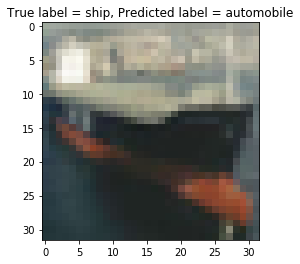

In [38]:
misclass_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclass_index)
plt.imshow(X_test[i])
plt.title(f"True label = {labels[y_test[i]]}, Predicted label = {labels[p_test[i]]}")

Text(0.5, 1.0, 'True label = airplane, Predicted label = cat')

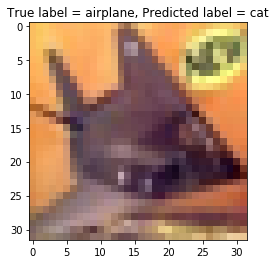

In [39]:
misclass_index = np.where(p_test != y_test)[0]
i = np.random.choice(misclass_index)
plt.imshow(X_test[i])
plt.title(f"True label = {labels[y_test[i]]}, Predicted label = {labels[p_test[i]]}")

In [47]:
# Much more complex data than the MNIST!
# WIll attempt to augment the data -> thereby hopefully imrpoving the performance!